#                           Project Title - 

# Image Classification of Handwritten Digits

## Objective -
The aim of this project is to implement a classification algorithm to recognize handwritten digits (0‐9).

## Why Image Classification - 
Image classification is a task where the system takes an input image and classifies it with an appropriate label.

Today Image classification is used by any organization to make the process streamline, simple and fast. Have you ever wonder about my system is capable to identify my and my family’s faces, cars are capable to follow traffic rules automatically, This all happens when Image Processing came into account.

## Why is image classifcation a hard task?
Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.


## Models Used -

## Breif on KNN -
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

## Breif on ANN(Artificial Neural Network) -
An artificial neural network is an attempt to simulate the network of neurons that make up a human brain so that the computer will be able to learn things and make decisions in a humanlike manner. ANNs are created by programming regular computers to behave as though they are interconnected brain cells.

## Deep learning - 
A deep neural network is a specific type of neural network that excels at capturing nonlinear relationships in data. Deep neural networks have surpassed many benchmarks in audio and image classification. 

### Importing Libraries -

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd

In [2]:
data = load_digits()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Defining feature and Label columns

In [4]:
labels = pd.Series(data["target"])

In [5]:
data = pd.DataFrame(data["data"])

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Visualizing some of the images in data

In [7]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)


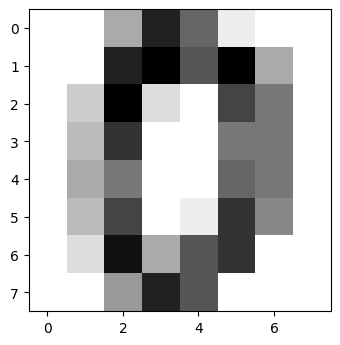

In [8]:
plt.imshow(np_image,cmap = 'gray_r')

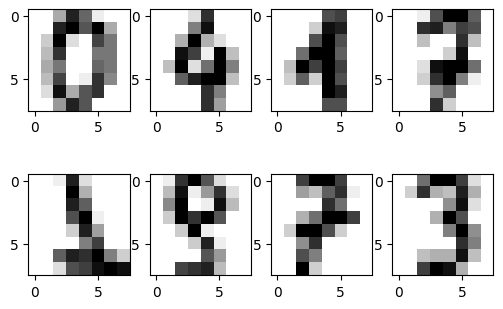

In [9]:
fig,ax = plt.subplots(2,4)
ax[0,0].imshow(data.iloc[0].values.reshape(8,8),cmap = "gray_r")
ax[0,1].imshow(data.iloc[100].values.reshape(8,8),cmap = "gray_r")
ax[0,2].imshow(data.iloc[200].values.reshape(8,8),cmap = "gray_r")
ax[0,3].imshow(data.iloc[300].values.reshape(8,8),cmap = "gray_r")
ax[1,0].imshow(data.iloc[1000].values.reshape(8,8),cmap = "gray_r")
ax[1,1].imshow(data.iloc[1100].values.reshape(8,8),cmap = "gray_r")
ax[1,2].imshow(data.iloc[1200].values.reshape(8,8),cmap = "gray_r")
ax[1,3].imshow(data.iloc[1300].values.reshape(8,8),cmap = "gray_r")

### KNN Model -

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [11]:
def train_knn(nneighbors,train_features,train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn = knn.fit(train_features,train_labels)
    return knn

In [12]:
def test_knn(model,test_features,test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df["correct labels"] = test_labels
    train_test_df["predicted labels"] = predictions
    overallaccuracy = sum(train_test_df["predicted labels"]==train_test_df["correct labels"])/len(train_test_df)
    return overallaccuracy

In [13]:
def cross_validate(k):
    fold_accuracies =[]
    kf = KFold(n_splits=4,shuffle = True,random_state = 2)
    for train_index,test_index in kf.split(data):
        train_features,test_features = data.loc[train_index],data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k,train_features,train_labels)
        overall_accuracy = test_knn(model,test_features,test_labels) 
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        

In [14]:
knn_oneaccuracy = cross_validate(1)
np.mean(knn_oneaccuracy)

0.9888728037614452

In [15]:
k_values = list(range(1,10))
knn_accuracies = []
for k in k_values:
    knn_accuracy = cross_validate(k)
    knn_accuracies.append(np.mean(knn_accuracy))

Text(0.5, 1.0, 'K Value VS KNN Mean Accuracy')

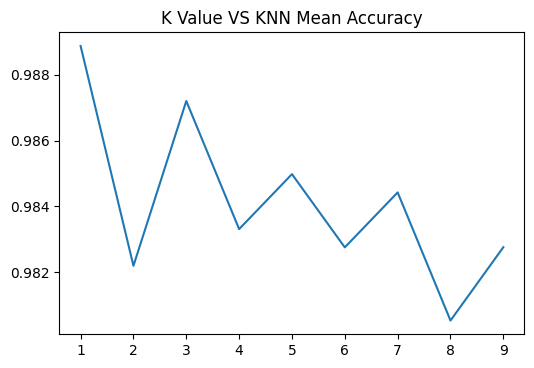

In [16]:
plt.plot(k_values,knn_accuracies)
plt.title("K Value VS KNN Mean Accuracy")

### Neural Network with one hidden layer

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier


def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch,activation = "logistic",solver = "adam")
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

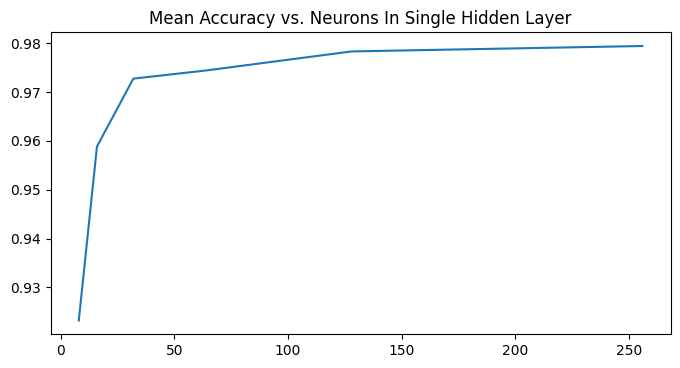

In [18]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)


### Summary:
It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Neural Network with two hidden layers

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



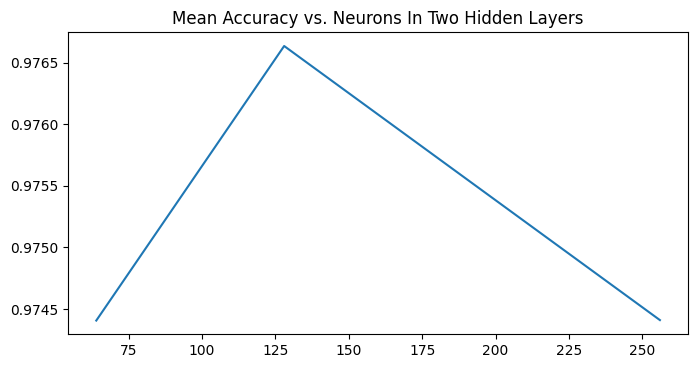

In [19]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [20]:
nn_two_accuracies

[0.9744060876020787, 0.976635733729275, 0.9744097995545656]

### Summary:
Using 2 hidden layers improved our simple accuracy to 98%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

### Neural Network With Three Hidden Layers -

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold


def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

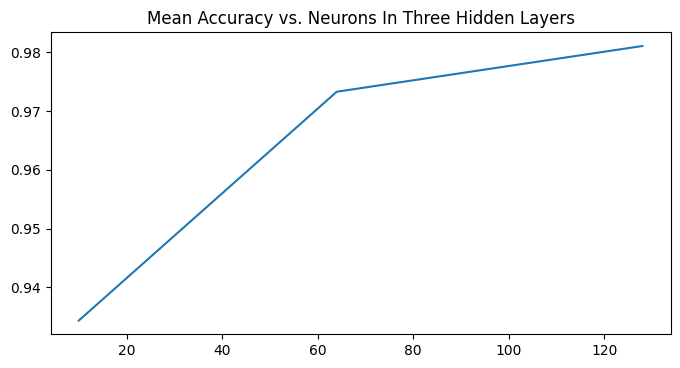

In [22]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [23]:
nn_three_accuracies

[0.9343478260869565, 0.9732998885172798, 0.9810850984764029]

### Summary:
Using 3 hidden layers returned a simple accuracy of nearly 98%, even with 6-fold cross validation.

### Conclusion - 

In the first case, model KNN yielded 98% accuracy but it is okay to use for this data set. when it comes to larger data sets, using KNN would be infeasible as it is vulnerable with big data sets. 
Comparing one,two and three layered neural network, it is feasible to use three layered - 128 neuron neural network as it produces highest percentage of accuracy which is around 98% with 6 fold cross valuidation to counter the problem of over fitting. 